In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from utilsforecast.plotting import plot_series
from utilsforecast.evaluation import evaluate

In [4]:
df = pd.read_csv("./data/nepsealpha_export_price_NTC_2021-01-03_2026-01-03_unadjusted.csv", encoding="latin1")
df.head()

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume,Turn Over
0,NTC,2026-01-01,905.0,909.0,902.2,905.0,0.00 %,"74,592.00","67,568,456.30"
1,NTC,2025-12-31,909.0,909.0,900.0,905.0,0.02 %,"40,304.00","36,498,409.60"
2,NTC,2025-12-29,908.0,911.0,898.0,904.8,-0.13 %,"38,244.00","34,636,425.70"
3,NTC,2025-12-28,909.9,909.9,896.0,906.0,1.18 %,"38,661.00","34,912,329.80"
4,NTC,2025-12-24,916.9,916.9,890.0,895.4,-0.40 %,"39,968.00","35,856,692.70"


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# df.drop("Percent Change",axis=1,inplace=True)
# df.drop("Volume",axis=1,inplace=True)
df.drop("Symbol",axis=1,inplace=True)
df.drop("Turn Over",axis=1,inplace=True)

In [7]:
df['Percent Change'] = df['Percent Change'].str.replace('%', '').astype(float) / 100
df['price_change'] = df['Percent Change'] * df['Close']

In [8]:
df['price_change'] = df['price_change'].round(1)
df.drop("Percent Change",axis=1,inplace=True)

In [9]:
df.head()

,Date,Open,High,Low,Close,Volume,price_change
0,2026-01-01,905.0,909.0,902.2,905.0,"74,592.00",0.0
1,2025-12-31,909.0,909.0,900.0,905.0,"40,304.00",0.2
2,2025-12-29,908.0,911.0,898.0,904.8,"38,244.00",-1.2
3,2025-12-28,909.9,909.9,896.0,906.0,"38,661.00",10.7
4,2025-12-24,916.9,916.9,890.0,895.4,"39,968.00",-3.6


In [10]:
df['Volume'] = df['Volume'].astype(str).str.replace(',', '', regex=False)
df['Volume'] = df['Volume'].replace('-', 0) # Replace hyphens with NaN
df['Volume'] = pd.to_numeric(df['Volume'])

In [11]:
df

,Date,Open,High,Low,Close,Volume,price_change
0,2026-01-01,905.0,909.0,902.2,905.0,74592.0,0.0
1,2025-12-31,909.0,909.0,900.0,905.0,40304.0,0.2
2,2025-12-29,908.0,911.0,898.0,904.8,38244.0,-1.2
3,2025-12-28,909.9,909.9,896.0,906.0,38661.0,10.7
4,2025-12-24,916.9,916.9,890.0,895.4,39968.0,-3.6
...,...,...,...,...,...,...,...
1161,2021-01-07,1282.0,1295.0,1263.0,1268.0,0.0,-0.3
1162,2021-01-06,1300.0,1300.0,1277.0,1288.0,0.0,0.1
1163,2021-01-05,1250.0,1306.0,1250.0,1275.0,0.0,-0.1
1164,2021-01-04,1320.0,1346.0,1270.0,1291.0,0.0,-0.1


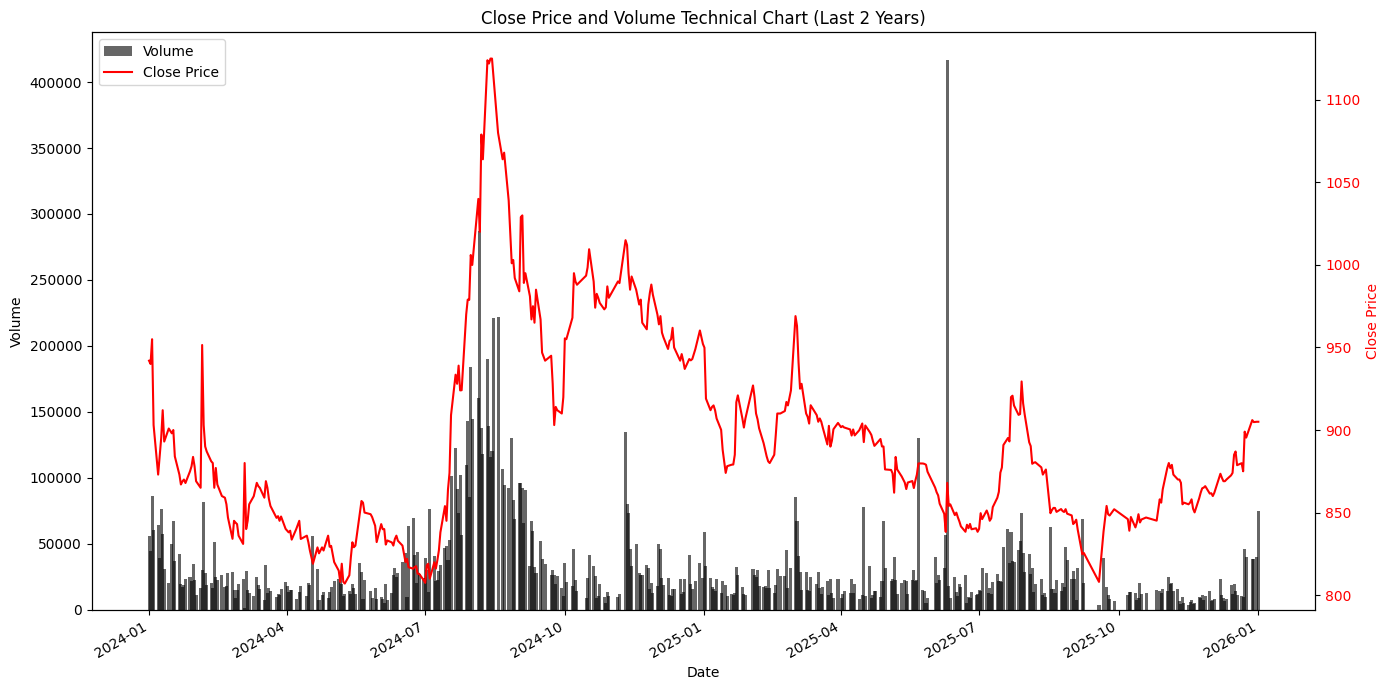

In [12]:
import matplotlib.pyplot as plt

# Ensure the DataFrame is sorted by Date
df_sorted = df.sort_values(by='Date').copy()

# Filter for the last 2 years of data
end_date = df_sorted['Date'].max()
start_date = end_date - pd.DateOffset(years=2)
df_filtered = df_sorted[(df_sorted['Date'] >= start_date) & (df_sorted['Date'] <= end_date)]

# Create figure and primary axes for Volume
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Volume as a bar chart on ax1
ax1.bar(df_filtered['Date'], df_filtered['Volume'], color='black', alpha=0.6, label='Volume', width=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for Close price
ax2 = ax1.twinx()

# Plot Close price as a line chart on ax2
ax2.plot(df_filtered['Date'], df_filtered['Close'], color='red', label='Close Price')
ax2.set_ylabel('Close Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set chart title and legends
plt.title('Close Price and Volume Technical Chart (Last 2 Years)')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Rotate x-axis labels for better readability
fig.autofmt_xdate()

plt.tight_layout()
plt.show()

In [13]:
df_long = df.melt(
    id_vars=["Date"],
    value_vars=["Open", "High", "Low", "Close","Volume","price_change"],
    var_name="unique_id",
    value_name="y"
).rename(columns={"Date": "ds"})

In [14]:
df_long.head()

,ds,unique_id,y
0,2026-01-01,Open,905.0
1,2025-12-31,Open,909.0
2,2025-12-29,Open,908.0
3,2025-12-28,Open,909.9
4,2025-12-24,Open,916.9


In [15]:
df_long = (
    df_long
    .groupby(['ds', 'unique_id'], as_index=False)['y']
    .mean()
)


In [16]:
df_long

,ds,unique_id,y
0,2021-01-03,Close,1302.0
1,2021-01-03,High,1304.0
2,2021-01-03,Low,1225.0
3,2021-01-03,Open,1235.0
4,2021-01-03,Volume,0.0
...,...,...,...
6991,2026-01-01,High,909.0
6992,2026-01-01,Low,902.2
6993,2026-01-01,Open,905.0
6994,2026-01-01,Volume,74592.0


In [17]:
df_long.info

<bound method DataFrame.info of              ds     unique_id        y
0    2021-01-03         Close   1302.0
1    2021-01-03          High   1304.0
2    2021-01-03           Low   1225.0
3    2021-01-03          Open   1235.0
4    2021-01-03        Volume      0.0
...         ...           ...      ...
6991 2026-01-01          High    909.0
6992 2026-01-01           Low    902.2
6993 2026-01-01          Open    905.0
6994 2026-01-01        Volume  74592.0
6995 2026-01-01  price_change      0.0

[6996 rows x 3 columns]>

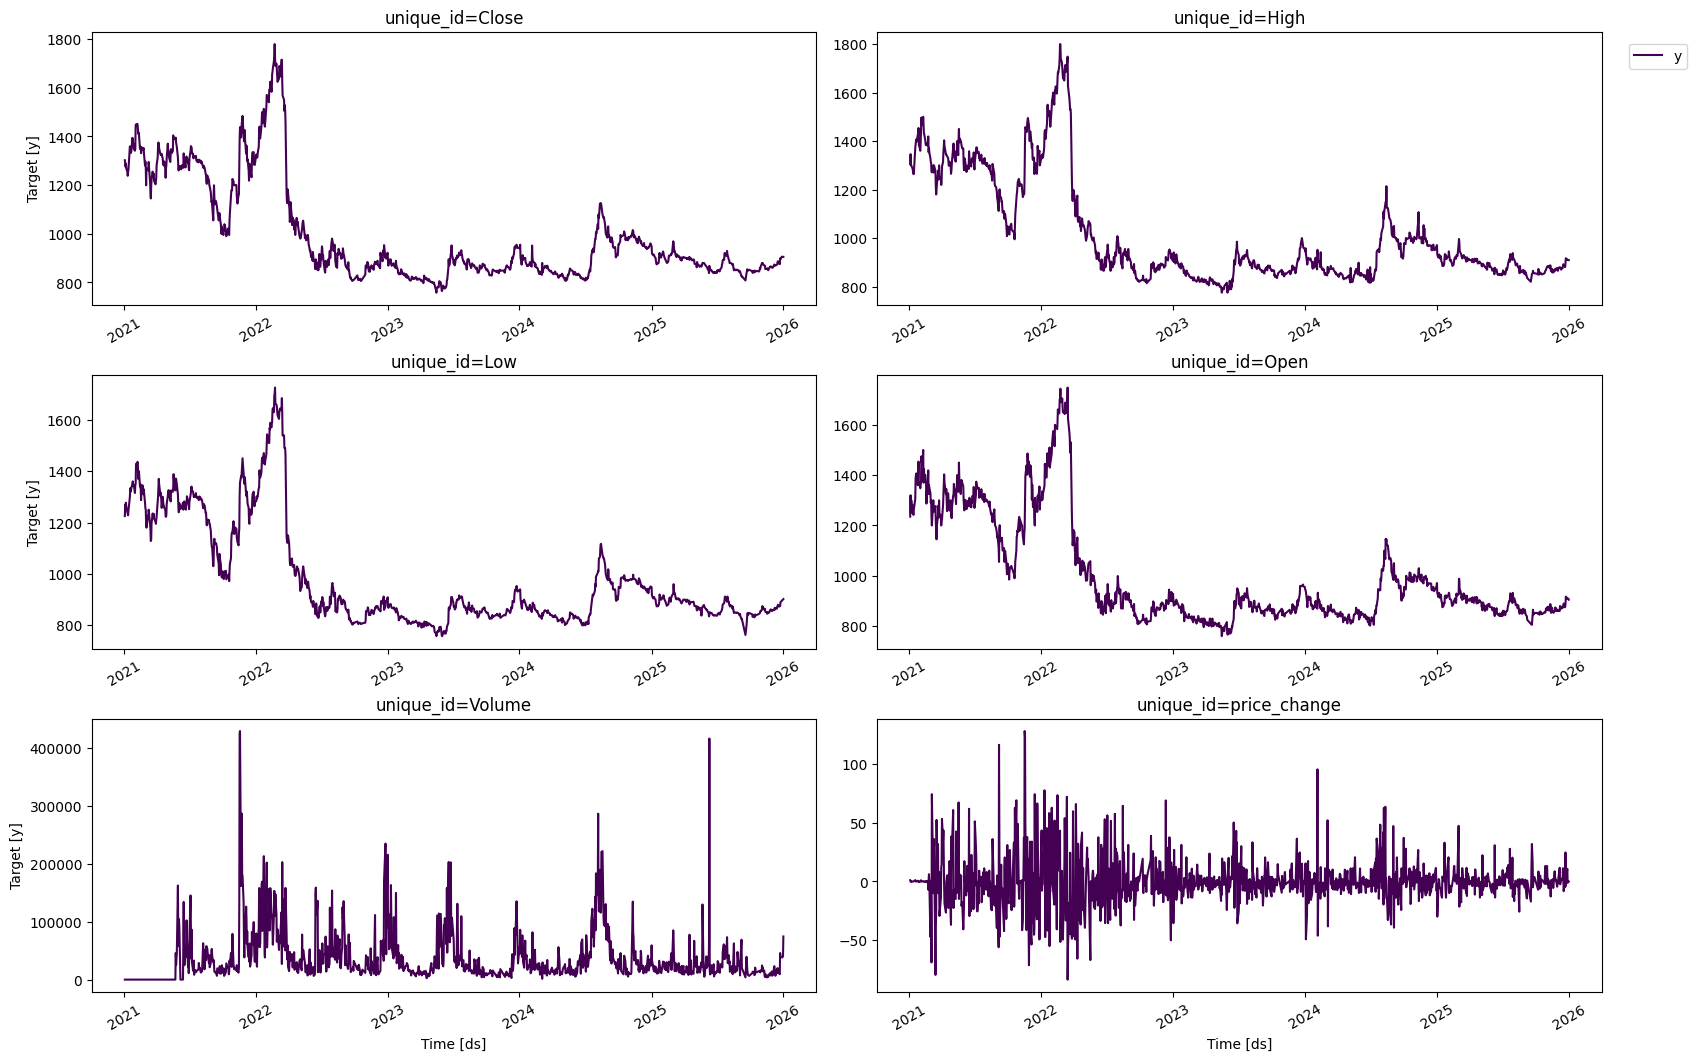

In [18]:
plot_series(df=df_long, palette="viridis")

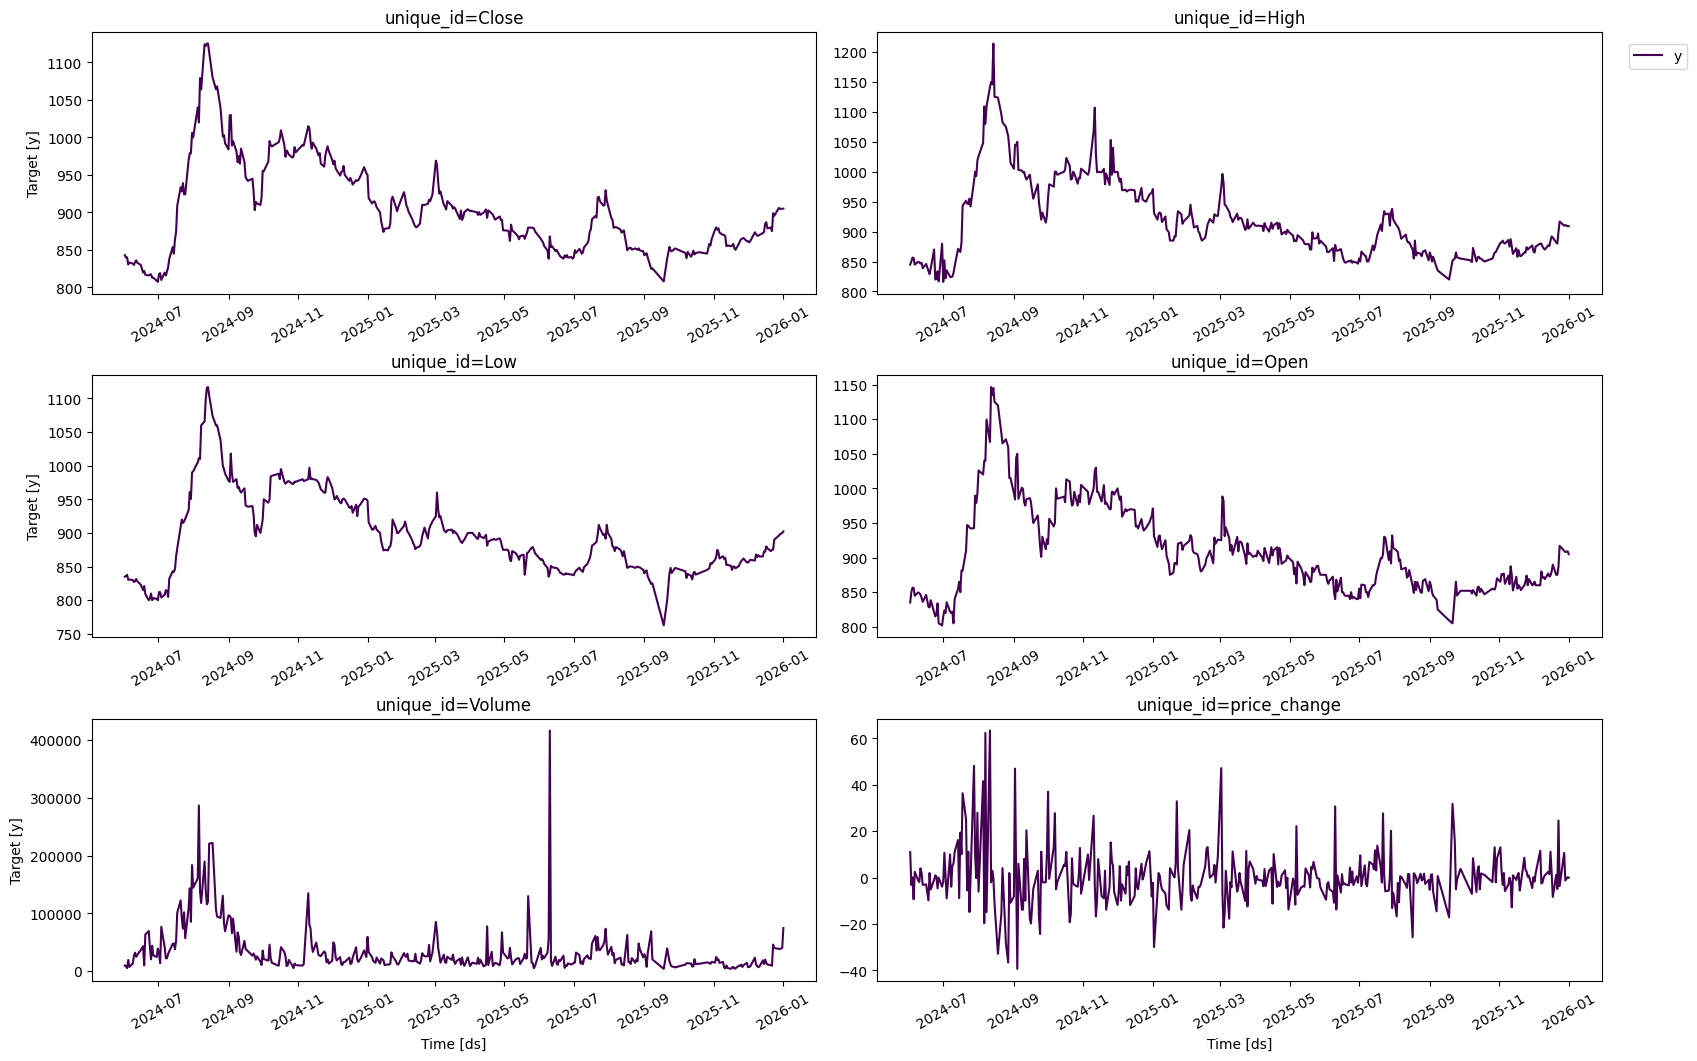

In [19]:
plot_series(df=df_long, max_insample_length=30*12, palette="viridis")

Time Series Decomposition

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

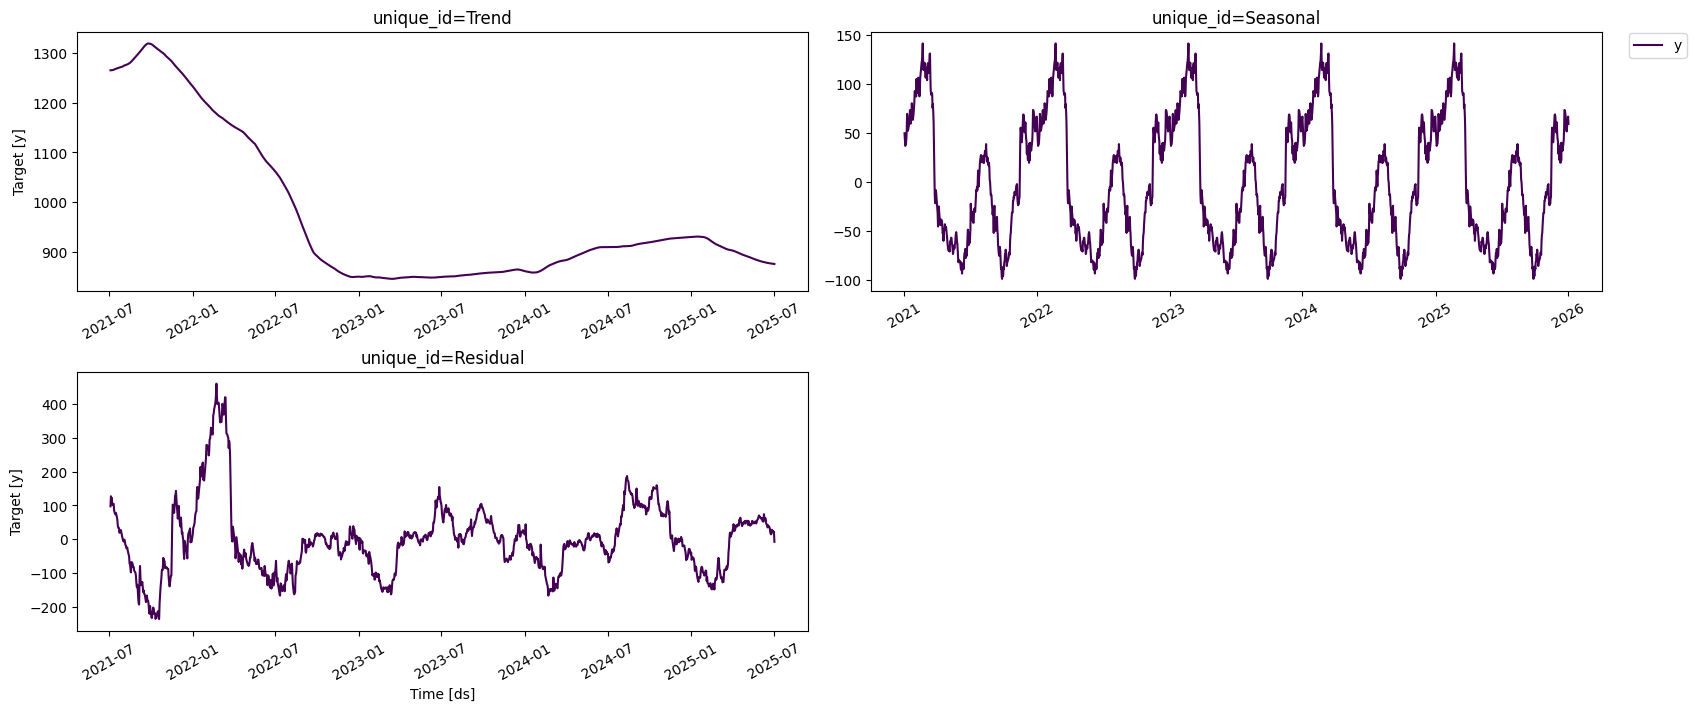

In [21]:
var = "Close"
ts = (
    df_long[df_long["unique_id"] == var]
    .set_index("ds")["y"]
    .asfreq("D") # Changed from "h" to "D" for daily data
    .interpolate(method="linear") # Interpolate missing values
)

result = seasonal_decompose(ts, model="additive", period=365) # Changed period to 7 for weekly seasonality

components_long = pd.concat([
    result.trend.rename("Trend"),
    result.seasonal.rename("Seasonal"),
    result.resid.rename("Residual")
], axis=1).reset_index().melt(id_vars="ds", var_name="unique_id", value_name="y")

plot_series(
    df=pd.DataFrame({"ds": ts.index, "unique_id": var, "y": ts.values}),
    max_insample_length=365, # Adjusted for daily data plotting length
    forecasts_df=components_long,
    ids=["Trend", "Seasonal", "Residual"],
    palette="viridis"
)

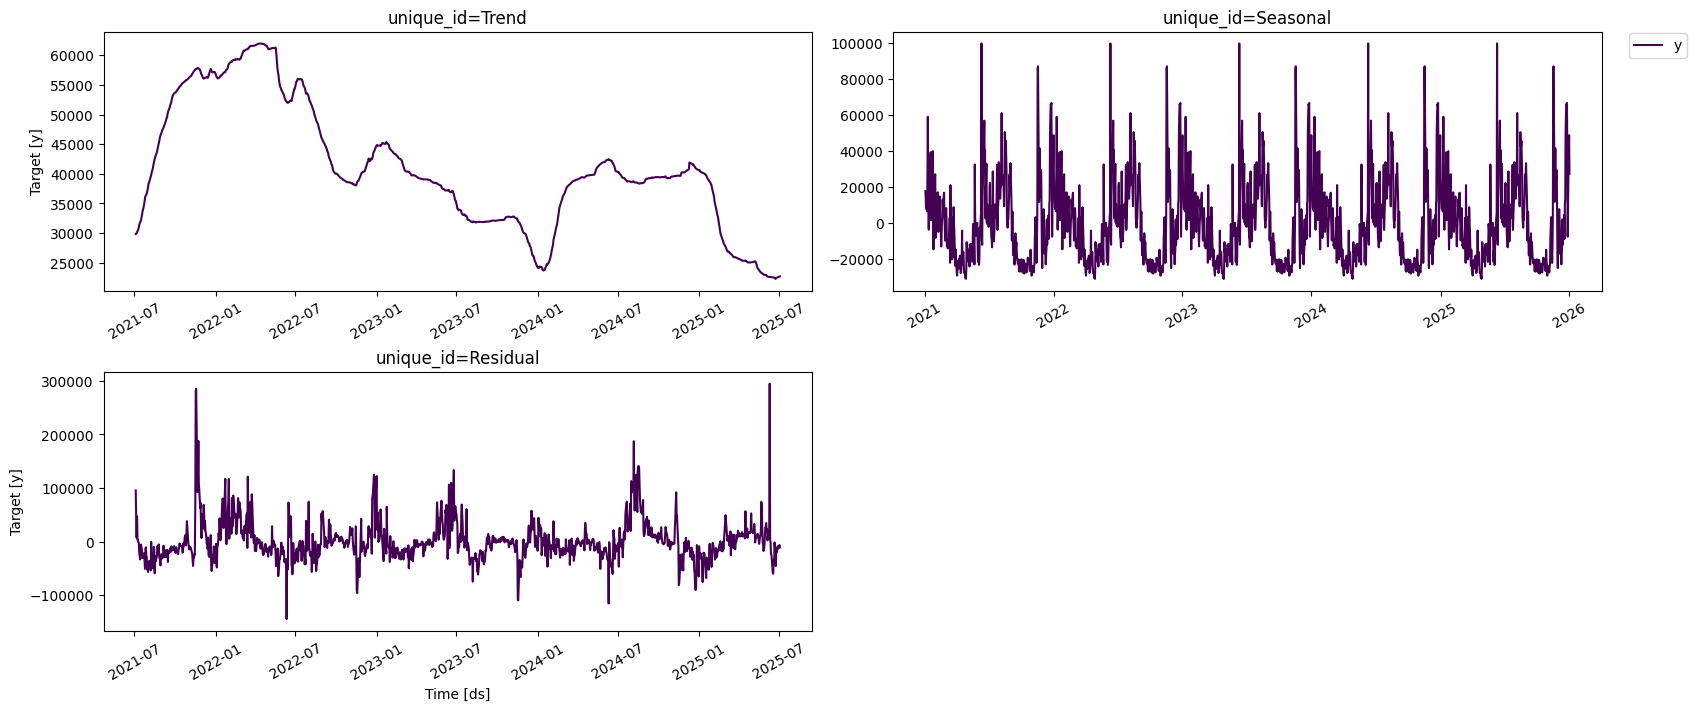

In [22]:
var = "Volume"
ts = (
    df_long[df_long["unique_id"] == var]
    .set_index("ds")["y"]
    .asfreq("D")
    .interpolate(method="linear")
)

result = seasonal_decompose(ts, model="additive", period=365)

components_long = pd.concat([
    result.trend.rename("Trend"),
    result.seasonal.rename("Seasonal"),
    result.resid.rename("Residual")
], axis=1).reset_index().melt(id_vars="ds", var_name="unique_id", value_name="y")

plot_series(
    df=pd.DataFrame({"ds": ts.index, "unique_id": var, "y": ts.values}),
    max_insample_length=365,
    forecasts_df=components_long,
    ids=["Trend", "Seasonal", "Residual"],
    palette="viridis"
)

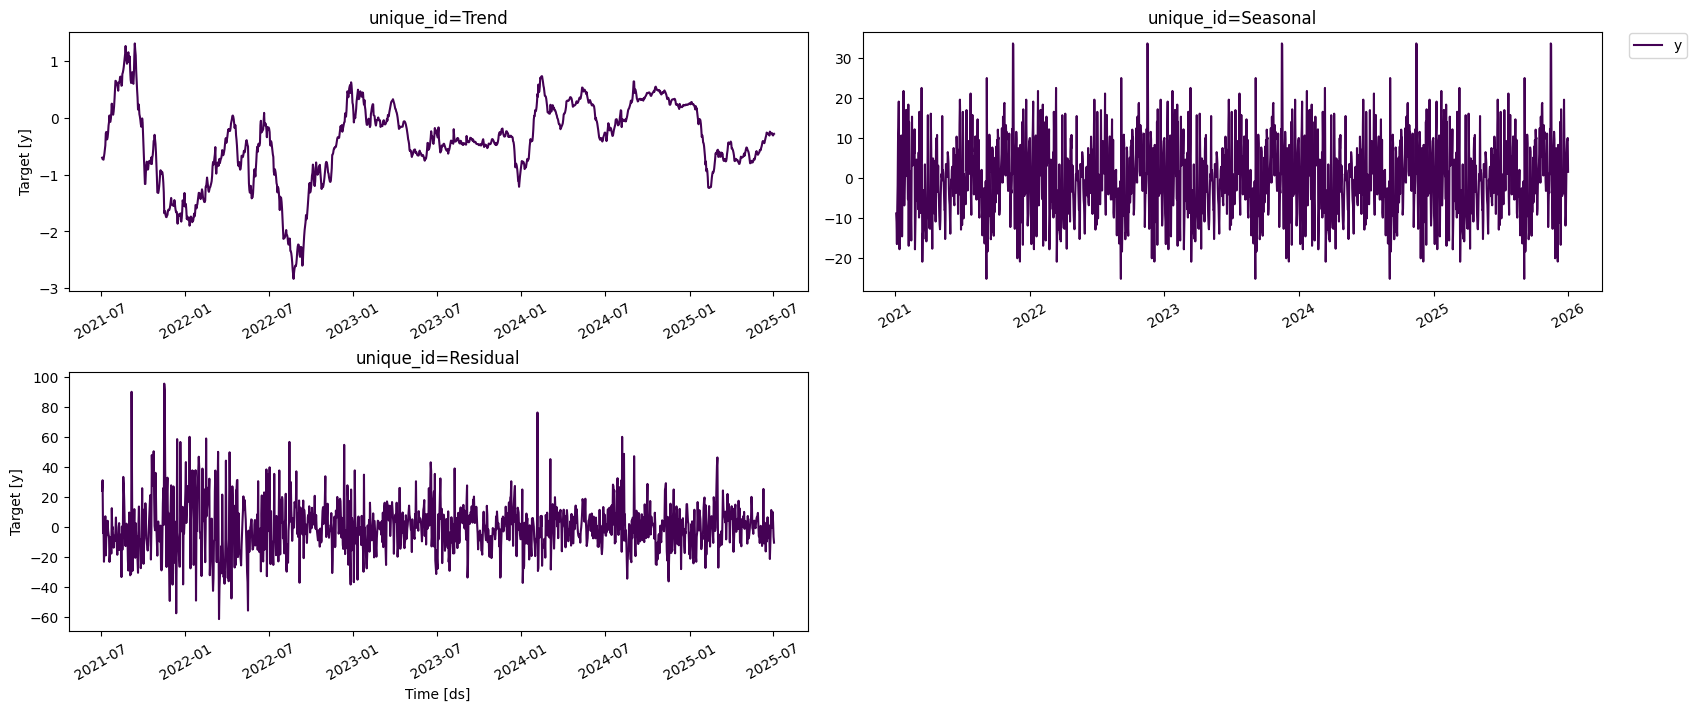

In [23]:
var = "price_change"
ts = (
    df_long[df_long["unique_id"] == var]
    .set_index("ds")["y"]
    .asfreq("D") # Changed from "h" to "D" for daily data
    .interpolate(method="linear") # Interpolate missing values
)

result = seasonal_decompose(ts, model="additive", period=365) # Changed period to 7 for weekly seasonality

components_long = pd.concat([
    result.trend.rename("Trend"),
    result.seasonal.rename("Seasonal"),
    result.resid.rename("Residual")
], axis=1).reset_index().melt(id_vars="ds", var_name="unique_id", value_name="y")

plot_series(
    df=pd.DataFrame({"ds": ts.index, "unique_id": var, "y": ts.values}),
    max_insample_length=365, # Adjusted for daily data plotting length
    forecasts_df=components_long,
    ids=["Trend", "Seasonal", "Residual"],
    palette="viridis"
)

In [24]:
df.head()

,Date,Open,High,Low,Close,Volume,price_change
0,2026-01-01,905.0,909.0,902.2,905.0,74592.0,0.0
1,2025-12-31,909.0,909.0,900.0,905.0,40304.0,0.2
2,2025-12-29,908.0,911.0,898.0,904.8,38244.0,-1.2
3,2025-12-28,909.9,909.9,896.0,906.0,38661.0,10.7
4,2025-12-24,916.9,916.9,890.0,895.4,39968.0,-3.6


In [26]:
def calculate_technical_indicators(df):
    # Calculate RSI
    def RSI(series, period):
        delta = series.diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
        RS = gain / loss
        return 100 - (100 / (1 + RS))
    df['momentum_rsi'] = RSI(df['Close'],14)
    
    # Calculate SMA
    df['trend_sma_fast'] = df['Close'].rolling(window=10).mean()
    
    # Calculate WMA
    weights = np.arange(1, 11)
    df['wma'] = df['Close'].rolling(10).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)
    
    # Calculate Momentum
    df['momentum'] = df['Close'].diff(10)
    
    # Calculate MACD
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['trend_macd'] = df['EMA12'] - df['EMA26']
    
    # Calculate Stochastic Oscillator K% and D%
    low_min = df['Low'].rolling(window=14).min()
    high_max = df['High'].rolling(window=14).max()
    df['stoch_k'] = 100 * ((df['Close'] - low_min) / (high_max - low_min))
    df['stoch_d'] = df['stoch_k'].rolling(window=3).mean()
    
    # Calculate William's %R
    df['momentum_wr'] = -100 * (high_max - df['Close']) / (high_max - low_min)
    
    # Calculate CCI
    TP = (df['Close'] + df['High'] + df['Low']) / 3
    df['trend_cci'] = (TP - TP.rolling(window=20).mean()) / (0.015 * TP.rolling(window=20).std())
    
    # Calculate A/D Oscillator
    df['volume_adi'] = ((df['Close'] - df['Low']) - (df['High'] - df['Close'])) / (df['High'] - df['Low'])
    
    # Calculate HMA
    def WMA(series, window):
        weights = np.arange(1, window + 1)
        return series.rolling(window).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)
    
    def HMA(series, window):
        half_length = int(window / 2)
        sqrt_length = int(np.sqrt(window))
        WMA_half = WMA(series, half_length)
        WMA_full = WMA(series, window)
        HMA = WMA(2 * WMA_half - WMA_full, sqrt_length)
        return HMA
    
    df['hma'] = HMA(df['Close'], 10)
    
    return df

# Calculate technical indicators
dataframe = calculate_technical_indicators(df)

# Display the first few rows with technical indicators
dataframe

,Date,Open,High,Low,Close,Volume,price_change,momentum_rsi,trend_sma_fast,wma,momentum,EMA12,EMA26,trend_macd,stoch_k,stoch_d,momentum_wr,trend_cci,volume_adi,hma
0,2026-01-01,905.0,909.0,902.2,905.0,74592.0,0.0,NaN,NaN,NaN,NaN,905.000000,905.000000,0.000000,NaN,NaN,NaN,NaN,-0.176471,NaN
1,2025-12-31,909.0,909.0,900.0,905.0,40304.0,0.2,NaN,NaN,NaN,NaN,905.000000,905.000000,0.000000,NaN,NaN,NaN,NaN,0.111111,NaN
2,2025-12-29,908.0,911.0,898.0,904.8,38244.0,-1.2,NaN,NaN,NaN,NaN,904.969231,904.985185,-0.015954,NaN,NaN,NaN,NaN,0.046154,NaN
3,2025-12-28,909.9,909.9,896.0,906.0,38661.0,10.7,NaN,NaN,NaN,NaN,905.127811,905.060357,0.067454,NaN,NaN,NaN,NaN,0.438849,NaN
4,2025-12-24,916.9,916.9,890.0,895.4,39968.0,-3.6,NaN,NaN,NaN,NaN,903.631224,904.344775,-0.713550,NaN,NaN,NaN,NaN,-0.598513,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,2021-01-07,1282.0,1295.0,1263.0,1268.0,0.0,-0.3,37.012987,1300.2,1281.145455,-126.0,1302.154631,1326.547745,-24.393114,17.699115,11.356932,-82.300885,-78.068195,-0.687500,1231.169697
1162,2021-01-06,1300.0,1300.0,1277.0,1288.0,0.0,0.1,36.393443,1295.0,1278.927273,-52.0,1299.976996,1323.692357,-23.715361,26.548673,18.731563,-73.451327,-58.618604,-0.043478,1242.494949
1163,2021-01-05,1250.0,1306.0,1250.0,1275.0,0.0,-0.1,36.156352,1289.3,1275.290909,-57.0,1296.134381,1320.085516,-23.951135,23.857868,22.701885,-76.142132,-67.292947,-0.107143,1257.898990
1164,2021-01-04,1320.0,1346.0,1270.0,1291.0,0.0,-0.1,34.228188,1284.4,1275.600000,-49.0,1295.344476,1317.931033,-22.586557,31.979695,27.462079,-68.020305,-30.859961,-0.447368,1274.926263


In [27]:
dataframe.dropna(inplace=True)
dataframe

,Date,Open,High,Low,Close,Volume,price_change,momentum_rsi,trend_sma_fast,wma,momentum,EMA12,EMA26,trend_macd,stoch_k,stoch_d,momentum_wr,trend_cci,volume_adi,hma
19,2025-12-02,865.0,865.0,858.1,860.0,7090.0,-1.7,23.790323,870.60,867.863636,-27.0,872.720464,882.556082,-9.835618,5.604720,12.654990,-94.395280,-94.089608,-0.449275,865.045354
20,2025-12-01,861.5,867.0,856.0,861.7,6734.0,0.2,37.236084,868.27,866.245455,-23.3,871.025008,881.011187,-9.986179,15.833333,9.585042,-84.166667,-84.222172,0.036364,862.331313
21,2025-11-30,860.0,877.0,856.0,861.5,14037.0,-4.5,30.590717,867.02,865.014545,-12.5,869.559622,879.565914,-10.006292,15.277778,12.238610,-84.722222,-63.857124,-0.476190,860.320303
22,2025-11-27,869.0,871.9,862.0,866.0,10215.0,0.9,37.475345,866.37,864.829091,-6.5,869.011988,878.561032,-9.549044,27.777778,19.629630,-72.222222,-50.757315,-0.191919,860.326364
23,2025-11-26,860.0,870.0,860.0,865.1,7244.0,0.4,24.711316,865.88,864.598182,-4.9,868.410144,877.563918,-9.153775,31.379310,24.811622,-68.620690,-57.259683,0.020000,861.704343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,2021-01-07,1282.0,1295.0,1263.0,1268.0,0.0,-0.3,37.012987,1300.20,1281.145455,-126.0,1302.154631,1326.547745,-24.393114,17.699115,11.356932,-82.300885,-78.068195,-0.687500,1231.169697
1162,2021-01-06,1300.0,1300.0,1277.0,1288.0,0.0,0.1,36.393443,1295.00,1278.927273,-52.0,1299.976996,1323.692357,-23.715361,26.548673,18.731563,-73.451327,-58.618604,-0.043478,1242.494949
1163,2021-01-05,1250.0,1306.0,1250.0,1275.0,0.0,-0.1,36.156352,1289.30,1275.290909,-57.0,1296.134381,1320.085516,-23.951135,23.857868,22.701885,-76.142132,-67.292947,-0.107143,1257.898990
1164,2021-01-04,1320.0,1346.0,1270.0,1291.0,0.0,-0.1,34.228188,1284.40,1275.600000,-49.0,1295.344476,1317.931033,-22.586557,31.979695,27.462079,-68.020305,-30.859961,-0.447368,1274.926263


In [28]:
def process_indicators(df:pd.DataFrame, close:str, sma:str, wma:str, stK:str, stD:str, will:str, macd:str, rsi:str, cci:str, ad:str, momentum:str)->pd.DataFrame:
    pr_sma = []
    pr_wma = []
    pr_stK = []
    pr_stD = []
    pr_will = []
    pr_macd = []
    pr_rsi = []
    pr_cci = []
    pr_ad = []
    pr_moment = []
    prev_row = df.iloc[0]
    for i in range(0, len(df.index)):
        row = df.iloc[i]
        prev_close = prev_row[close]
        r_close = row[close]
        # SMA
        if r_close > row[sma]:
            pr_sma.append(1)
        else:
            pr_sma.append(-1)

        # WMA
        if r_close > row[wma]:
            pr_wma.append(1)
        else:
            pr_wma.append(-1)

        # stochasticK
        if row[stK] > prev_row[stK]:
            pr_stK.append(1)
        else:
            pr_stK.append(-1)
        
        # stochasticD
        if row[stD] > prev_row[stD]:
            pr_stD.append(1)
        else:
            pr_stD.append(-1)
        
        # William's oscillator
        if row[will] > prev_row[will]:
            pr_will.append(1)
        else:
            pr_will.append(-1)
        
        # MACD
        if row[macd] > prev_row[macd]:
            pr_macd.append(1)
        else:
            pr_macd.append(-1)
        
        # RSI
        if row[rsi] > 70:
            pr_rsi.append(-1)
        elif row[rsi] < 30:
            pr_rsi.append(1)
        else:
            if row[rsi] > prev_row[rsi]:
                pr_rsi.append(1)
            else:
                pr_rsi.append(-1)
        
        # cci
        if row[cci] > 200:
            pr_cci.append(-1)
        elif row[cci] < 200:
            pr_cci.append(1)
        else:
            if row[cci] > prev_row[cci]:
                pr_cci.append(1)
            else:
                pr_cci.append(-1)
        
        # A/D oscillator
        if row[ad] > prev_row[ad]:
            pr_ad.append(1)
        else:
            pr_ad.append(-1)
        
        # Momentum
        if row[momentum] >= 0:
            pr_moment.append(1)
        else:
            pr_moment.append(-1)
    
        prev_row = row
    
    df["pr_sma"] = pr_sma
    df["pr_wma"] = pr_wma
    df["pr_stK"] = pr_stK
    df["pr_stD"] = pr_stD
    df["pr_will"] = pr_will
    df["pr_macd"] = pr_macd
    df["pr_rsi"] = pr_rsi
    df["pr_cci"] = pr_cci
    df["pr_ad"] = pr_ad
    df["pr_moment"] = pr_moment

    # df = df.drop([sma, wma, stK, stD, will, macd, rsi, cci, ad, momentum], axis=1)

    return df

In [29]:
dataframe = process_indicators(dataframe,
                "Close",
                "trend_sma_fast",
                "wma",
                "stoch_k",
                "stoch_d",
                "momentum_wr",
                "trend_macd",
                "momentum_rsi",
                "trend_cci",
                "volume_adi",
                "momentum"
                )

In [30]:
dataframe.head()

,Date,Open,High,Low,Close,Volume,price_change,momentum_rsi,trend_sma_fast,wma,...,pr_sma,pr_wma,pr_stK,pr_stD,pr_will,pr_macd,pr_rsi,pr_cci,pr_ad,pr_moment
19,2025-12-02,865.0,865.0,858.1,860.0,7090.0,-1.7,23.790323,870.60,867.863636,...,-1,-1,-1,-1,-1,-1,1,1,-1,-1
20,2025-12-01,861.5,867.0,856.0,861.7,6734.0,0.2,37.236084,868.27,866.245455,...,-1,-1,1,-1,1,-1,1,1,1,-1
21,2025-11-30,860.0,877.0,856.0,861.5,14037.0,-4.5,30.590717,867.02,865.014545,...,-1,-1,-1,1,-1,-1,-1,1,-1,-1
22,2025-11-27,869.0,871.9,862.0,866.0,10215.0,0.9,37.475345,866.37,864.829091,...,-1,1,1,1,1,1,1,1,1,-1
23,2025-11-26,860.0,870.0,860.0,865.1,7244.0,0.4,24.711316,865.88,864.598182,...,-1,1,1,1,1,1,1,1,1,-1


In [32]:
def prepare_trend_array(df):
    trend_arr = []
    close_vals = df[["Close"]].values
    if len(close_vals) == 0:
        return trend_arr

    pre_val = close_vals[0]
    hh_val = pre_val
    hl_val = pre_val

    # HH, HL= 1,2 / LH, LL = 3,4 / Neut = 0

    trend_arr.append(0)
    for i in range(1, len(close_vals)):
        cur_val = close_vals[i]
        # high
        if cur_val > pre_val:
            # HH
            if cur_val >= hh_val:
                trend_arr.append(1)
                hh_val = cur_val
            # LH
            else:
                trend_arr.append(3)

        # low
        elif cur_val < pre_val:
            # HL
            if cur_val >= hl_val:
                trend_arr.append(2)
                hl_val = cur_val
            # LL
            else:
                trend_arr.append(4)

        # neut
        else:
            trend_arr.append(0)
        
        pre_val = cur_val

    if len(trend_arr) > 0:
        val = trend_arr[1]
        if val == 1 or val == 3:
            # label first value as HH
            trend_arr[0] = 1
        elif val == 2 or val == 4:
            # label first value as HL
            trend_arr[0] = 2
    
    return trend_arr

def add_trend_columns(df: pd.DataFrame, close: str):
    hh_arr = []
    hl_arr = []
    lh_arr = []
    trend_arr = prepare_trend_array(df)

    index = 0
    for i in trend_arr:
        if i == 1:
            hh_arr.append(1)
            hl_arr.append(0)
            lh_arr.append(0)
        elif i==2:
            hh_arr.append(0)
            hl_arr.append(1)
            lh_arr.append(0)
        elif i == 3:
            hh_arr.append(0)
            hl_arr.append(0)
            lh_arr.append(1)
        elif i == 4:
            hh_arr.append(0)
            hl_arr.append(0)
            lh_arr.append(0)
        else:
            if index != 0:
                hh_arr.append(hh_arr[index-1])
                hl_arr.append(hl_arr[index-1])
                lh_arr.append(lh_arr[index-1])
            else:
                hh_arr.append(0)
                hl_arr.append(0)
                lh_arr.append(0)
        
        index += 1

    # label the first element(s) -> HL or HH
    if len(trend_arr) > 1:
        val = trend_arr[1]
        if val == 1 or val == 3:
            # label first value as HH
            hh_arr[0] = 1
        elif val == 2 or val == 4:
            # label first value as HL
            hl_arr[0] = 1

    df["trend_hh"] = np.array(hh_arr)
    df["trend_hl"] = np.array(hl_arr)
    df["trend_lh"] = np.array(lh_arr)  

    return df    

In [33]:
dataframe = add_trend_columns(dataframe, "Close")

In [34]:
dataframe.head()

,Date,Open,High,Low,Close,Volume,price_change,momentum_rsi,trend_sma_fast,wma,...,pr_stD,pr_will,pr_macd,pr_rsi,pr_cci,pr_ad,pr_moment,trend_hh,trend_hl,trend_lh
19,2025-12-02,865.0,865.0,858.1,860.0,7090.0,-1.7,23.790323,870.60,867.863636,...,-1,-1,-1,1,1,-1,-1,1,0,0
20,2025-12-01,861.5,867.0,856.0,861.7,6734.0,0.2,37.236084,868.27,866.245455,...,-1,1,-1,1,1,1,-1,1,0,0
21,2025-11-30,860.0,877.0,856.0,861.5,14037.0,-4.5,30.590717,867.02,865.014545,...,1,-1,-1,-1,1,-1,-1,0,1,0
22,2025-11-27,869.0,871.9,862.0,866.0,10215.0,0.9,37.475345,866.37,864.829091,...,1,1,1,1,1,1,-1,1,0,0
23,2025-11-26,860.0,870.0,860.0,865.1,7244.0,0.4,24.711316,865.88,864.598182,...,1,1,1,1,1,1,-1,0,1,0


In [35]:
def get_trend_change(df:pd.DataFrame, close:str):
    print("Adding trend")
    df["trend"] = df[close].diff()
    df = df.dropna()
    df = df.reset_index(drop=True)

    return df

In [36]:
def calculate_alpha(close_df):
    mean_dif = close_df.diff().abs().sum() / (len(close_df.index) - 1)
    mean_close = close_df.mean()

    alpha = mean_dif / mean_close
    print("alpha:", alpha)
    return alpha

In [37]:
# creating the target dataset (Y data) for stop price prediction component
def add_stop_price(df, trade_window=10, alpha=0.1):
    print("Adding stop price")
    # alpha = calculate_alpha(df["Close"])
    close_vals = df[["Close"]].values
    
    # print(close_vals.shape)

    def find_max_index(values):
        index = values.argmax(axis=0)[0]
        return index

    exit_points = np.array([], dtype=int)

    for i in range(0, len(close_vals) // trade_window):
        window_values = close_vals[i*trade_window:(i+1)*trade_window]
        # pattern = [0] * len(window_values)

        max_index = find_max_index(window_values)

        max_value = window_values[max_index]
        # increase the value of the exit point
        window_values[max_index] = max_value + max_value * alpha
        
        # decrease the values of other entries
        for i in range(len(window_values)):
            if i != max_index:
                val = window_values[i]
                window_values[i] = val - val * alpha

        exit_points = np.concatenate((exit_points, window_values), axis=None)

    # add the values which are in the end that exceeds the trade_window
    if (len(close_vals) % trade_window) != 0:
        window_values = close_vals[-(len(close_vals) % trade_window):]

        # decrease the values of other entries
        for i in range(len(window_values)):
            val = window_values[i]
            window_values[i] = val - val * alpha
        
        exit_points = np.concatenate((exit_points, window_values), axis=None)

    df["stop_price"] = exit_points

    return df

In [38]:
# add y_trend
dataframe = get_trend_change(dataframe, "Close")

Adding trend


In [39]:
# calculate diff alpha
stop_alpha = calculate_alpha(dataframe["Close"])

alpha: 0.013768087158702117


In [40]:
trade_window = 10
dataframe = add_stop_price(dataframe, trade_window, stop_alpha)

Adding stop price


In [41]:
dataframe.head()

,Date,Open,High,Low,Close,Volume,price_change,momentum_rsi,trend_sma_fast,wma,...,pr_macd,pr_rsi,pr_cci,pr_ad,pr_moment,trend_hh,trend_hl,trend_lh,trend,stop_price
0,2025-12-01,861.5,867.0,856.0,861.7,6734.0,0.2,37.236084,868.27,866.245455,...,-1,1,1,1,-1,1,0,0,1.7,849.836039
1,2025-11-30,860.0,877.0,856.0,861.5,14037.0,-4.5,30.590717,867.02,865.014545,...,-1,-1,1,-1,-1,0,1,0,-0.2,849.638793
2,2025-11-27,869.0,871.9,862.0,866.0,10215.0,0.9,37.475345,866.37,864.829091,...,1,1,1,1,-1,1,0,0,4.5,877.923163
3,2025-11-26,860.0,870.0,860.0,865.1,7244.0,0.4,24.711316,865.88,864.598182,...,1,1,1,1,-1,0,1,0,-0.9,853.189228
4,2025-11-25,874.0,874.0,858.0,864.7,11152.0,2.7,25.659472,865.45,864.383636,...,1,1,1,-1,-1,0,0,0,-0.4,852.794735


In [42]:
# get column indexes to seperate data for model inputs
non_disc_col_indexes = dataframe.columns.get_indexer([
                            "trend_sma_fast",
                            "wma",
                            "stoch_k",
                            "stoch_d",
                            "momentum_wr",
                            "trend_macd",
                            "momentum_rsi",
                            "trend_cci",
                            "volume_adi",
                            "momentum"
                        ])

disc_col_indexes = dataframe.columns.get_indexer([
                            "pr_sma",
                            "pr_wma",
                            "pr_stK",
                            "pr_stD",
                            "pr_will",
                            "pr_macd",
                            "pr_rsi",
                            "pr_cci",
                            "pr_ad",
                            "pr_moment"
                        ])

In [63]:
from sklearn.preprocessing import MinMaxScaler

# Scale data
scaler = MinMaxScaler(feature_range=(-1, 1))

In [64]:
dataframe.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'price_change',
       'momentum_rsi', 'trend_sma_fast', 'wma', 'momentum', 'EMA12', 'EMA26',
       'trend_macd', 'stoch_k', 'stoch_d', 'momentum_wr', 'trend_cci',
       'volume_adi', 'hma', 'pr_sma', 'pr_wma', 'pr_stK', 'pr_stD', 'pr_will',
       'pr_macd', 'pr_rsi', 'pr_cci', 'pr_ad', 'pr_moment', 'trend_hh',
       'trend_hl', 'trend_lh', 'trend', 'stop_price'],
      dtype='object')

In [65]:
scaling_values = dataframe.values.reshape(-1, len(dataframe.columns))
scaling_values

array([[ 8.61500000e+02,  8.67000000e+02,  8.56000000e+02, ...,
         0.00000000e+00,  1.70000000e+00,  8.49836039e+02],
       [ 8.60000000e+02,  8.77000000e+02,  8.56000000e+02, ...,
         0.00000000e+00, -2.00000000e-01,  8.49638793e+02],
       [ 8.69000000e+02,  8.71900000e+02,  8.62000000e+02, ...,
         0.00000000e+00,  4.50000000e+00,  8.77923163e+02],
       ...,
       [ 1.25000000e+03,  1.30600000e+03,  1.25000000e+03, ...,
         0.00000000e+00, -1.30000000e+01,  1.25744569e+03],
       [ 1.32000000e+03,  1.34600000e+03,  1.27000000e+03, ...,
         1.00000000e+00,  1.60000000e+01,  1.27322540e+03],
       [ 1.23500000e+03,  1.30400000e+03,  1.22500000e+03, ...,
         1.00000000e+00,  1.10000000e+01,  1.28407395e+03]],
      shape=(1146, 34))

In [66]:
max_values = scaling_values.max(axis=0, keepdims=True)[0]
min_values = scaling_values.min(axis=0, keepdims=True)[0]
max_values

array([ 1.74820000e+03,  1.79990000e+03,  1.72500000e+03,  1.77900000e+03,
        4.29788000e+05,  1.27700000e+02,  9.20509442e+01,  1.70140000e+03,
        1.71303636e+03,  5.88700000e+02,  1.67994022e+03,  1.58393360e+03,
        1.66648654e+02,  1.00000000e+02,  9.63265945e+01, -0.00000000e+00,
        2.41846251e+02,  1.00000000e+00,  1.75646768e+03,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        2.95000000e+02,  1.80349343e+03])

In [67]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1146 entries, 2025-12-01 to 2021-01-03
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            1146 non-null   float64
 1   High            1146 non-null   float64
 2   Low             1146 non-null   float64
 3   Close           1146 non-null   float64
 4   Volume          1146 non-null   float64
 5   price_change    1146 non-null   float64
 6   momentum_rsi    1146 non-null   float64
 7   trend_sma_fast  1146 non-null   float64
 8   wma             1146 non-null   float64
 9   momentum        1146 non-null   float64
 10  EMA12           1146 non-null   float64
 11  EMA26           1146 non-null   float64
 12  trend_macd      1146 non-null   float64
 13  stoch_k         1146 non-null   float64
 14  stoch_d         1146 non-null   float64
 15  momentum_wr     1146 non-null   float64
 16  trend_cci       1146 non-null   float64
 17  volume_adi     

In [54]:
dataframe.head()

,Date,Open,High,Low,Close,Volume,price_change,momentum_rsi,trend_sma_fast,wma,...,pr_macd,pr_rsi,pr_cci,pr_ad,pr_moment,trend_hh,trend_hl,trend_lh,trend,stop_price
0,2025-12-01,861.5,867.0,856.0,861.7,6734.0,0.2,37.236084,868.27,866.245455,...,-1,1,1,1,-1,1,0,0,1.7,849.836039
1,2025-11-30,860.0,877.0,856.0,861.5,14037.0,-4.5,30.590717,867.02,865.014545,...,-1,-1,1,-1,-1,0,1,0,-0.2,849.638793
2,2025-11-27,869.0,871.9,862.0,866.0,10215.0,0.9,37.475345,866.37,864.829091,...,1,1,1,1,-1,1,0,0,4.5,877.923163
3,2025-11-26,860.0,870.0,860.0,865.1,7244.0,0.4,24.711316,865.88,864.598182,...,1,1,1,1,-1,0,1,0,-0.9,853.189228
4,2025-11-25,874.0,874.0,858.0,864.7,11152.0,2.7,25.659472,865.45,864.383636,...,1,1,1,-1,-1,0,0,0,-0.4,852.794735


In [55]:
dataframe.index = pd.to_datetime(dataframe['Date'], format = '%Y-%m-%d')

In [56]:
dataframe.head()

,Date,Open,High,Low,Close,Volume,price_change,momentum_rsi,trend_sma_fast,wma,...,pr_macd,pr_rsi,pr_cci,pr_ad,pr_moment,trend_hh,trend_hl,trend_lh,trend,stop_price
Date,,,,,,,,,,,,,,,,,,,,,
2025-12-01,2025-12-01,861.5,867.0,856.0,861.7,6734.0,0.2,37.236084,868.27,866.245455,...,-1,1,1,1,-1,1,0,0,1.7,849.836039
2025-11-30,2025-11-30,860.0,877.0,856.0,861.5,14037.0,-4.5,30.590717,867.02,865.014545,...,-1,-1,1,-1,-1,0,1,0,-0.2,849.638793
2025-11-27,2025-11-27,869.0,871.9,862.0,866.0,10215.0,0.9,37.475345,866.37,864.829091,...,1,1,1,1,-1,1,0,0,4.5,877.923163
2025-11-26,2025-11-26,860.0,870.0,860.0,865.1,7244.0,0.4,24.711316,865.88,864.598182,...,1,1,1,1,-1,0,1,0,-0.9,853.189228
2025-11-25,2025-11-25,874.0,874.0,858.0,864.7,11152.0,2.7,25.659472,865.45,864.383636,...,1,1,1,-1,-1,0,0,0,-0.4,852.794735


In [57]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])

In [58]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1146 entries, 2025-12-01 to 2021-01-03
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1146 non-null   datetime64[ns]
 1   Open            1146 non-null   float64       
 2   High            1146 non-null   float64       
 3   Low             1146 non-null   float64       
 4   Close           1146 non-null   float64       
 5   Volume          1146 non-null   float64       
 6   price_change    1146 non-null   float64       
 7   momentum_rsi    1146 non-null   float64       
 8   trend_sma_fast  1146 non-null   float64       
 9   wma             1146 non-null   float64       
 10  momentum        1146 non-null   float64       
 11  EMA12           1146 non-null   float64       
 12  EMA26           1146 non-null   float64       
 13  trend_macd      1146 non-null   float64       
 14  stoch_k         1146 non-null   float6

In [59]:
dataframe.drop("Date",axis=1,inplace=True)
dataframe.head()

,Open,High,Low,Close,Volume,price_change,momentum_rsi,trend_sma_fast,wma,momentum,...,pr_macd,pr_rsi,pr_cci,pr_ad,pr_moment,trend_hh,trend_hl,trend_lh,trend,stop_price
Date,,,,,,,,,,,,,,,,,,,,,
2025-12-01,861.5,867.0,856.0,861.7,6734.0,0.2,37.236084,868.27,866.245455,-23.3,...,-1,1,1,1,-1,1,0,0,1.7,849.836039
2025-11-30,860.0,877.0,856.0,861.5,14037.0,-4.5,30.590717,867.02,865.014545,-12.5,...,-1,-1,1,-1,-1,0,1,0,-0.2,849.638793
2025-11-27,869.0,871.9,862.0,866.0,10215.0,0.9,37.475345,866.37,864.829091,-6.5,...,1,1,1,1,-1,1,0,0,4.5,877.923163
2025-11-26,860.0,870.0,860.0,865.1,7244.0,0.4,24.711316,865.88,864.598182,-4.9,...,1,1,1,1,-1,0,1,0,-0.9,853.189228
2025-11-25,874.0,874.0,858.0,864.7,11152.0,2.7,25.659472,865.45,864.383636,-4.3,...,1,1,1,-1,-1,0,0,0,-0.4,852.794735


In [60]:
dataframe.dropna(inplace=True)

In [61]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1146 entries, 2025-12-01 to 2021-01-03
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            1146 non-null   float64
 1   High            1146 non-null   float64
 2   Low             1146 non-null   float64
 3   Close           1146 non-null   float64
 4   Volume          1146 non-null   float64
 5   price_change    1146 non-null   float64
 6   momentum_rsi    1146 non-null   float64
 7   trend_sma_fast  1146 non-null   float64
 8   wma             1146 non-null   float64
 9   momentum        1146 non-null   float64
 10  EMA12           1146 non-null   float64
 11  EMA26           1146 non-null   float64
 12  trend_macd      1146 non-null   float64
 13  stoch_k         1146 non-null   float64
 14  stoch_d         1146 non-null   float64
 15  momentum_wr     1146 non-null   float64
 16  trend_cci       1146 non-null   float64
 17  volume_adi     

In [68]:
max_indexes = scaling_values.argmax(axis=0)
min_indexes = scaling_values.argmin(axis=0)

# update values by 25%
for i in range(0, len(dataframe.columns)):
    scaling_values[max_indexes[i]][i] = max_values[i] + max_values[i] * 0.25
    scaling_values[min_indexes[i]][i] = min_values[i] - min_values[i] * 0.25

# fit scaler
scaler.fit(scaling_values)

# transform training values
scaled_data = scaler.transform(dataframe.values.reshape(-1, len(dataframe.columns)))

In [69]:
scaled_data

array([[-0.63906516, -0.65750243, -0.63785231, ..., -1.        ,
        -0.52413578, -0.65854138],
       [-0.64092246, -0.64551652, -0.63785231, ..., -1.        ,
        -0.53202533, -0.6587743 ],
       [-0.62977867, -0.65162934, -0.63029444, ..., -1.        ,
        -0.51250908, -0.62537468],
       ...,
       [-0.15802507, -0.1313207 , -0.14155251, ..., -1.        ,
        -0.58517596, -0.17721516],
       [-0.07135118, -0.08337703, -0.11635963, ...,  0.6       ,
        -0.46475657, -0.15858168],
       [-0.17659805, -0.13371788, -0.17304362, ...,  0.6       ,
        -0.48551853, -0.14577116]], shape=(1146, 34))

In [70]:
import tensorflow as tf
print("GPUs available:", tf.config.list_physical_devices('GPU'))

d:\Islington\Master\3rd\Deep Learning\developement\stop_loss_prediction\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


GPUs available: []
